# Bilevel LP before solving parametric LP 

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Dustin Kenefake", "Efstratios N. Pistikopoulos"]
__license__ = "Open"
__version__ = "1.0.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


## Problem Statement

In the following example a multi-scale energy systems mixed integer linear program (MILP) is reformulated as a mulitparametric linear program (mpLP)

## Nomenclature

*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t


*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{P}^{uncertain-cap}$ - set of processes with uncertain capacity

$\mathcal{P}^{uncertain-capex}$ - set of processes with uncertain capital expenditure

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making


*Continuous Variables*


$P_{p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$




*Binary Variables*


$X^P_{p,t}$ - network binary for production process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$X^S_{r,t}$ - network binary for inventory of resource r  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$



*Parametric Variables*


$\alpha_{p}$ - uncertainty in production capacity of process p $\in$ $\mathcal{P}^{uncertain-cap}$

$\beta_{r}$ - uncertainty in demand for resource r $\in$ $\mathcal{R}^{demand}$

$\gamma_{r}$ - uncertainty in purchase price for resource r $\in$ $\mathcal{R}^{cons}$

$\delta_{r}$ - uncertainty in consumption availability for resource r $\in$ $\mathcal{R}^{cons}$

$\epsilon_{p}$ - uncertainty in cost of technology for process p $\in$ $\mathcal{P}^{uncertain-capex}$



*Parameters*


$Cap^{P-max}_{p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Capex_{p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$




# MILP Formulation

Given is a general MILP modeling and optimization framework for simultaneous network design and scheduling.




\begin{equation}
    min \sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} Capex_{p,t} \times Cap^P_{p,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}}  Price_{r,t}  \times C_{r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{p \in \mathcal{P}}  Vopex_{r,t} \times P_{r,t} 
\end{equation}


\begin{equation}
    Cap^S_{r,t} \leq Cap^{S-max}_{r,t} \times X^S_{r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{p,t} \leq Cap^{P-max}_{p,t} \times X^P_p  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation} 

\begin{equation}
    P_{p,t} \leq Cap^{P}_{p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{r,t} \leq Cap^{S}_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{r,t} \leq - D_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{r,t} \leq C^{max}_{r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    - S_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    -Inv_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) + C_{r,t} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    S_{r,t}, C_{r,t}, Inv_{r,t}, P_{p,t}, Cap^P_p, Cap^S_r \in R_{\geq 0}
\end{equation}




## mpLP reformulation

Reformulated as an mpLP


\begin{equation}
    min \hspace{1cm} \sum_{p \in \mathcal{P}} Capex_p \times \epsilon_p \times P_p + \sum_{r \in \mathcal{R}^{cons}} C_r \times \gamma_r 
\end{equation}


\begin{equation}
    Inv_r \leq Cap^{S-max}_r \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    - S_r \leq - D_r \times \beta_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    C_r \leq C^{max}_r \times \delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons} 
\end{equation}

\begin{equation}
    P_p \leq Cap^{P-max}_p \times \alpha_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation} 

\begin{equation}
    - S_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}
\end{equation}

\begin{equation}
    - Inv_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) + C_{r} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \alpha_p \in A_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}

\begin{equation}
    \beta_r \in B_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    \gamma_r \in \Gamma_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \delta_r \in \Delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \epsilon_p \in E_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}


\begin{equation}
    S_r, C_r, Inv_r, P_p \in R_{\geq 0}
\end{equation}


## Example Problem


\begin{equation}
    p \in \{LI_c, LI_d, WF, PV\} 
\end{equation}


\begin{equation}
    r \in \{charge, power, wind, solar\} 
\end{equation}



\begin{equation}
    min \hspace{1cm} \left[\begin{matrix}1302\\0\\990\\567\end{matrix}\right]^T \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}Inv_{charge}\\C_{wind}\\C_{solar}\\P_{LI_c}\\P_{LI_d}\end{matrix}\right] \leq \left[\begin{matrix} 100\\100\\100\\100\\100\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}-S_{power}\\P_{WF}\\P_{PV}\end{matrix}\right] \leq \left[\begin{matrix}-300 & 0 & 0\\0 & 100 & 0\\0 & 0 & 100\end{matrix}\right] \left[\begin{matrix}\beta_{power}\\ \alpha_{WF}\\\alpha_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_4\left[\begin{matrix} - Inv_{charge} \\ -S_{power} \\ C_{wind} \\ C_{solar} \end{matrix}\right] + \left[\begin{matrix}0.89 & -1 & 0 & 0\\-1 & 1 & 0.85 & 0.75\\0 & 0 & -1 & 0\\0 & 0 & 0 & -1\end{matrix}\right] \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right] = 0
\end{equation}



\begin{equation}
    \alpha_p \in \mathcal{A}_p \hspace{1cm} \forall p \in \{WF, PV\} 
\end{equation}

\begin{equation}
    \beta_r \in \mathcal{B}_r \hspace{1cm} \forall r \in \{Power\} 
\end{equation}

$\textbf{Import modules}$

In [2]:
import sys
sys.path.append('../../src')

In [3]:
from energiapy.components.result import Result
# import polytope as pt
from ppopt.plot import parametric_plot
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.mplp_program import MPLP_Program
from ppopt.mpqp_program import MPQP_Program
import numpy
import pandas
import sympy
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario
from energiapy.model.formulate import formulate, Constraints, Objective, ModelClass
from energiapy.components.scenario import Scenario
from energiapy.components.location import Location
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.material import Material
from energiapy.components.temporal_scale import TemporalScale
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.utils.math_utils import min_max, normalize
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt 

import pandas
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner
from pandas import read_csv
import math
import h5py
from keras.models import Sequential
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Dense, Activation, Dropout, LSTM
from scipy.signal import savgol_filter
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import scipy.stats as stats

In [4]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('../data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)

solar = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

wind = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

# Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region
ercot = pandas.read_csv('../data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value
ercot.columns = ['Value']
demand = ercot


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_10932\1218713161.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_10932\1218713161.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ercot.index = pandas.to_datetime(ercot.index, utc = True)


In [5]:
solar = normalize(solar)
wind = normalize(wind)
demand = normalize(demand)

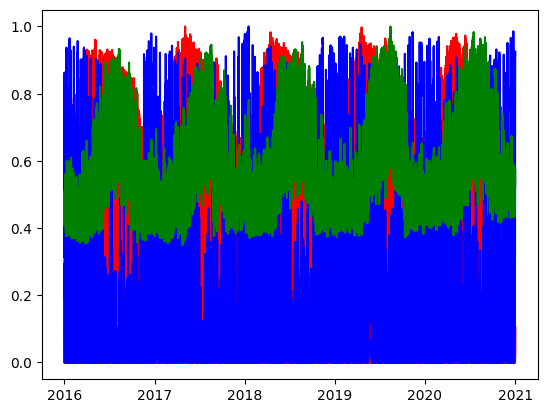

In [6]:
plt.plot(solar, color = 'red')
plt.plot(wind, color = 'blue')
plt.plot(demand, color = 'green')


In [22]:
window_size = 50
polynomial_degree = 2
smoothed_data = savgol_filter(dt['Values'], window_size, polynomial_degree)
start = '2017-01-01'
end = '2023-03-31'
dates = pandas.date_range(start=start, end=end)
filtered_data = pandas.DataFrame(smoothed_data, index=dates, columns=['Values'])
filtered_data = np.log(filtered_data)

NameError: name 'dt' is not defined

In [7]:
 # convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

all_y = solar.values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 30% test data, 70% training data
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 150
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(5,return_sequences=True,activation='relu'), 
#     tf.keras.layers.Dropout(0.10),
#     tf.keras.layers.LSTM(50,return_sequences=True,activation='relu'),
#     tf.keras.layers.Dropout(0.10),
#     tf.keras.layers.LSTM(20),
# ])

learning_rate = 0.0005
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dropout(0.3))
#model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(Dense(1))
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=optimizer)

# Train the model
history = model.fit(trainX, trainY, epochs=200, batch_size=240, verbose=1, validation_data=(testX, testY))
# model.save('C:\\Users\\Dell\\Desktop\\lstm_ci.h5')

Epoch 1/200



128/128 [==============================] - 3s 9ms/step - loss: 0.0261 - val_loss: 0.0124
Epoch 2/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0086
Epoch 3/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0065
Epoch 4/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 5/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0048
Epoch 6/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 7/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 8/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 9/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 10/200
128/128 [==============================] - 1s 5ms/step - loss: 0.0052 - val_loss: 0.0038
E

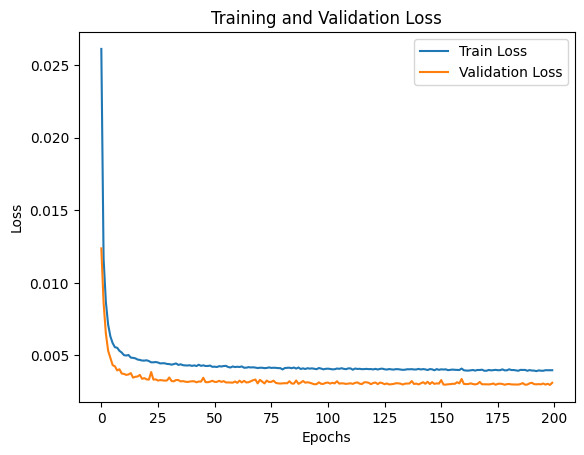

In [16]:
# Extract loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training loss and validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [17]:
def run_monte_carlo_dropout(model, X, n_samples=30):
    """
    Run Monte Carlo Dropout for making predictions.

    Parameters:
    model (keras.Model): The trained LSTM model.
    X (numpy.array): Input data for predictions.
    n_samples (int): Number of samples to draw.

    Returns:
    numpy.array: Mean predictions.
    numpy.array: Standard deviation of predictions.
    """
    predictions = np.zeros((n_samples, X.shape[0], X.shape[1]))

    for i in range(n_samples):
        predictions[i] = model.predict(X)

    mean_predictions = np.mean(predictions, axis=0)
    std_predictions = np.std(predictions, axis=0)

    return mean_predictions, std_predictions

In [12]:
n_samples = 30  # Number of MC Dropout samples
mean_predictions, std_predictions= run_monte_carlo_dropout(model, testX, n_samples)

406/406 [==============================] - 1s 2ms/step


In [13]:
mean_predictions = scaler.inverse_transform(mean_predictions.reshape(-1, 1)).flatten()
mean_predictions = np.exp(mean_predictions)
std_predictions = scaler.inverse_transform(std_predictions.reshape(-1, 1)).flatten()
std_predictions = np.exp(std_predictions) 

In [18]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


406/406 [==============================] - 1s 2ms/step


In [19]:

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = np.exp(trainPredict)
trainY = scaler.inverse_transform([trainY])
trainY = np.exp(trainY)
testPredict = scaler.inverse_transform(testPredict)
testPredict = np.exp(testPredict)
testY = scaler.inverse_transform([testY])
testY = np.exp(testY)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# Plot original data, mean predictions, and confidence intervals


ValueError: Found array with dim 3. None expected <= 2.

NameError: name 'mean_predictions' is not defined

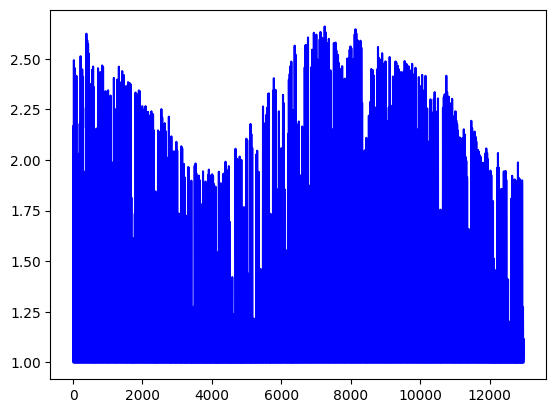

In [9]:


plt.plot(testY.flatten(), label='True Values', color= 'blue')
plt.plot(mean_predictions.flatten(), label='Mean Predictions', color = 'red')
plt.fill_between(
     range(len(mean_predictions.flatten())),
     mean_predictions.flatten() - 1.44 * std_predictions.flatten(),
     mean_predictions.flatten() + 1.44 * std_predictions.flatten(),
     color='blue', alpha=0.3, label='85% Confidence Intervals'
)
plt.fill_between(
     range(len(mean_predictions.flatten())),
     mean_predictions.flatten() - 1.96 * std_predictions.flatten(),
     mean_predictions.flatten() + 1.96 * std_predictions.flatten(),
     color='red', alpha=0.3, label='95% Confidence Intervals'
)
plt.legend()
plt.show()
last_sequence = dataset[-look_back:]
num_predictions = 30

predicted_values = []



for _ in range(num_predictions):
    last_sequence_reshaped = np.reshape(last_sequence, (1, 1, look_back))
    predicted_value = model.predict(last_sequence_reshaped)
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.append(last_sequence[1:], predicted_value[0])

# Invert the predictions back to the original scale
predicted_values = scaler.inverse_transform([predicted_values])
predicted_values = np.exp(predicted_values)
print(predicted_values)
# Generate a date range for the future predictions
start_date = pandas.to_datetime(dt.index[-1]) + pandas.DateOffset(days=1)  # Assuming the last date in dt is the latest date
end_date = start_date + pandas.DateOffset(days=num_predictions-1)
future_dates = pandas.date_range(start=start_date, end=end_date)
predicted_values = np.reshape(predicted_values, (num_predictions,))
predicted_df = pandas.DataFrame(predicted_values, index=future_dates, columns=['Predicted'])
predicted_df

$\textbf{Declare processes}$

In [152]:
def problem(demand_, solar_, wind_, range_):
    scales = TemporalScale(discretization_list=[1])
    
    Solar = Resource(name='Solar', cons_max=100, basis='MW', label='Solar Power')

    Wind = Resource(name='Wind', cons_max=100, basis='MW', label='Wind Power')

    Power = Resource(name='Power', basis='MW', label='Power generated', demand = True, varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = ((1 - range_)*demand_,(1 + range_)*demand_))#(min(demand['COAST']), 1))
    
    H2O = Resource(name='H2O', cons_max=500, basis='tons', label='Water')

    O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

    H2 = Resource(name='H2', basis='tons', label='Hydrogen', demand= True) #, varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (0.6, 0.8))

    Uranium = Resource(name='Uranium', cons_max=1000,
                   price=42.70/(250/2), basis='kg', label='Uranium')
    
    LiI = Process(name='LiI', storage=Power, vopex=1302, capex=0, fopex=0,  prod_max=100,
                storage_loss=0.11,  label='Lithium-ion battery', basis='MW', store_max=100)

    WF = Process(name='WF', conversion={Wind: -1, Power: 0.85}, vopex=990, capex=0, fopex=0,
                prod_max=100, label='Wind mill array', basis='MW', varying = [VaryingProcess.UNCERTAIN_CAPACITY], varying_bounds = ((1 - range_)*wind_, (1 + range_)*wind_))

    PV = Process(name='PV', conversion={Solar: -1, Power: 0.75}, vopex=567, capex=0, fopex=0,
                prod_max=100, label='Solar PV', basis='MW', varying = [VaryingProcess.UNCERTAIN_CAPACITY], varying_bounds = ((1 - range_)*solar_, (1 + range_)*solar_))

    PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, H2O: -3.1839}, capex=1.55*10**6, fopex=0,
              vopex=0, prod_max=100, prod_min = 0, basis = 'tons', label = 'PEM' )
    
    ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1},
               capex=7988951, fopex=0.04*0.730, vopex=0, prod_max=100, label='Small modular reactors (SMRs)', block='power_gen')
    
    region = Location(name='region', processes={
                    LiI, WF, PEM, PV, ASMR}, scales=scales, label='some region wo dispatchable')
    scenario = Scenario(name='example', demand={region: {Power:50, H2: 20}}, network=region, scales=scales, label='example scenario')
    matrix = formulate(scenario=scenario, model_class=ModelClass.MPLP)
    # print(matrix)
    # return matrix
    return matrix, solve(matrix = matrix, interface = 'native', name = 'results', solver = 'ppopt') 



In [153]:
solution =  [problem(demand_, solar_, wind_, 0.1) for demand_, solar_, wind_ in zip(demand, solar, wind)]

(0.9, 1.1)
The problem has the following variables:
Resource inventory level (Inv) x 1
Exact resource discharge (Sf) x 1
Uncertain resource discharge (S) x 1
Exact resource availability (Af) x 4
Uncertain resource availability (A) x 0
Exact resource price (Cf) x 4
Uncertain resource price (C) x 0
Exact process production (Pf) x 4
Uncertain process production (P) x 2
 For a total of 13 (10 fixed, and 3 uncertain)
[]
(0.8688916448875749, 1.0619786770848139)
The problem has the following variables:
Resource inventory level (Inv) x 1
Exact resource discharge (Sf) x 1
Uncertain resource discharge (S) x 1
Exact resource availability (Af) x 4
Uncertain resource availability (A) x 0
Exact resource price (Cf) x 4
Uncertain resource price (C) x 0
Exact process production (Pf) x 4
Uncertain process production (P) x 2
 For a total of 13 (10 fixed, and 3 uncertain)
[]
(0.8385385712560042, 1.0248804759795607)
The problem has the following variables:
Resource inventory level (Inv) x 1
Exact resource 

In [155]:
from ppopt.plot import parametric_plot
for s in solution:
    # parametric_plot(s)
    print(len(s[1].critical_regions))


1
1
1
1


In [162]:
ds = 20
coordinates = []
from itertools import product
for i,j,k in product(numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds)):
    l = solution[0][1].evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates.append((i, j, k, l[0][0]))

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_24568\1678484183.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)


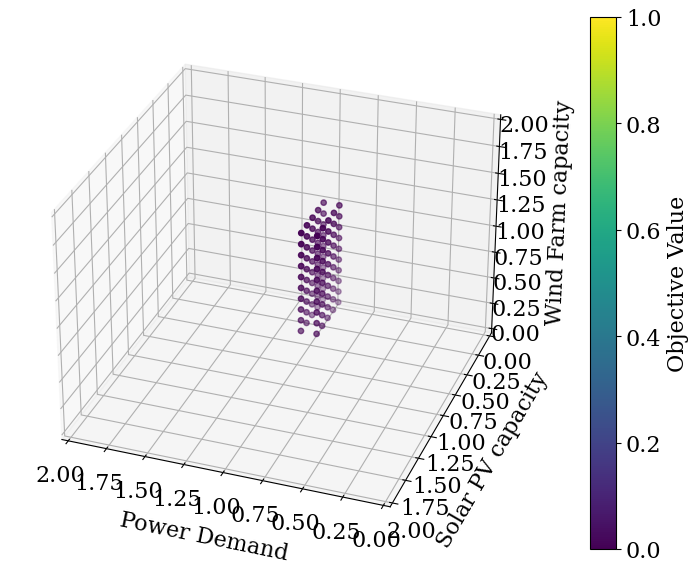

In [164]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rc

# Sample data: (x, y, z, color_value)
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
data = coordinates
fig = plt.figure(figsize= (10,6))
ax = fig.add_subplot(111, projection='3d')

x_vals, y_vals, z_vals, color_vals = zip(*data)



# Use color map to convert the color_value to a color
norm = plt.Normalize(5000, 150000)
colors = cm.viridis(norm(color_vals))
# colors = cm.viridis(norm)

scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)

# Add a color bar to show the mapping of color values
cbar = fig.colorbar(scatter, ax=ax)#, pad=0.1)
cbar.set_label('Objective Value')

# ax.set_ylim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_ylim(ax.get_zlim()[::-1])

# ax.zorder = 
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)

ax.set_xlabel('Power Demand', labelpad= 10)
ax.set_ylabel('Solar PV capacity', labelpad= 10)
ax.set_zlabel('Wind Farm capacity', labelpad= 10)
ax.view_init(elev=30, azim=110)
plt.tight_layout()
plt.rcdefaults()
plt.show()


In [161]:
solution[0][0]['CRb']

array([[ 1.1       ],
       [ 0.58742608],
       [ 1.1       ],
       [-0.9       ],
       [ 0.48062134],
       [ 0.9       ]])

In [12]:
ds = 20
coordinates_wo_disp = []
from itertools import product
for i,j,k in product(numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds)):
    l = solution_wo_disp.evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates_wo_disp.append((i, j, k, l[0][0]))

In [13]:
ds = 20
coordinates_w_disp = []
from itertools import product
for i,j,k in product(numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds)):
    l = solution_w_disp.evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates_w_disp.append((i, j, k, l[0][0]))

In [14]:
ds = 20
coordinates_wo_stor = []
from itertools import product
for i,j,k in product(numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds)):
    l = solution_wo_stor.evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates_wo_stor.append((i, j, k, l[0][0]))

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_12700\2862229716.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)


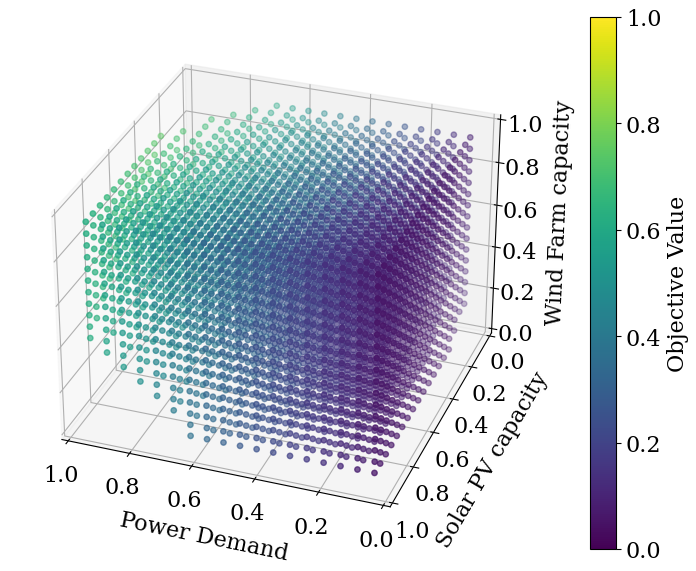

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rc

# Sample data: (x, y, z, color_value)
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
data = coordinates_wo_disp
fig = plt.figure(figsize= (10,6))
ax = fig.add_subplot(111, projection='3d')

x_vals, y_vals, z_vals, color_vals = zip(*data)



# Use color map to convert the color_value to a color
norm = plt.Normalize(5000, 150000)
colors = cm.viridis(norm(color_vals))
# colors = cm.viridis(norm)

scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)

# Add a color bar to show the mapping of color values
cbar = fig.colorbar(scatter, ax=ax)#, pad=0.1)
cbar.set_label('Objective Value')

# ax.set_ylim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_ylim(ax.get_zlim()[::-1])

# ax.zorder = 
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('Power Demand', labelpad= 10)
ax.set_ylabel('Solar PV capacity', labelpad= 10)
ax.set_zlabel('Wind Farm capacity', labelpad= 10)
ax.view_init(elev=30, azim=110)
plt.tight_layout()
plt.rcdefaults()
plt.show()


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_12700\736772587.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)


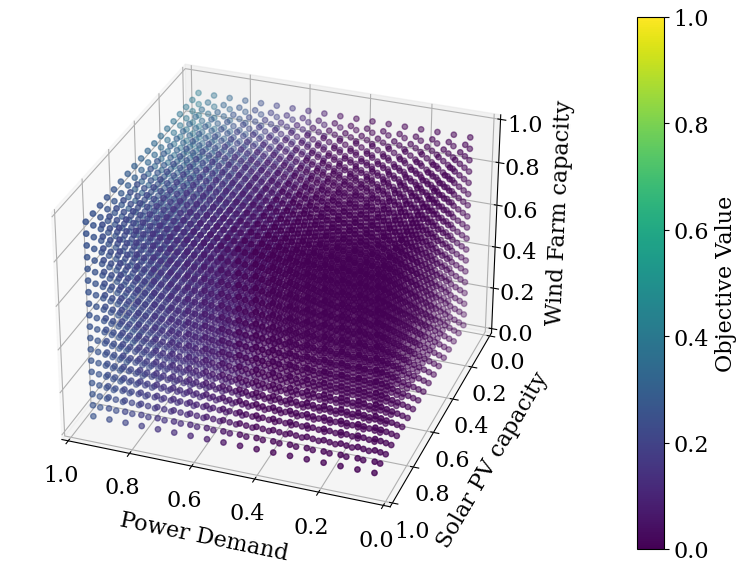

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Sample data: (x, y, z, color_value)
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
data = coordinates_w_disp
fig = plt.figure(figsize= (10,6))
ax = fig.add_subplot(111, projection='3d')

x_vals, y_vals, z_vals, color_vals = zip(*data)



# Use color map to convert the color_value to a color
norm = plt.Normalize(5000, 150000)
colors = cm.viridis(norm(color_vals))
# colors = cm.plasma(norm(color_vals))

# colors = cm.viridis(norm)


scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)

# Add a color bar to show the mapping of color values
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Objective Value')

# ax.set_ylim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_ylim(ax.get_zlim()[::-1])

# ax.zorder = 
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('Power Demand', labelpad= 10)
ax.set_ylabel('Solar PV capacity', labelpad= 10)
ax.set_zlabel('Wind Farm capacity', labelpad= 10)
ax.view_init(elev=30, azim=110)
plt.tight_layout()
plt.rcdefaults()
plt.show()

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_12700\856756224.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)


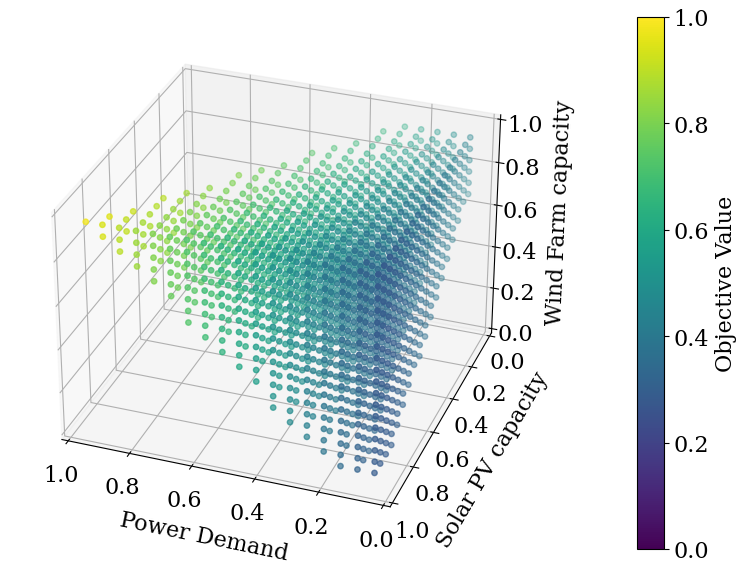

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Sample data: (x, y, z, color_value)
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
data = coordinates_wo_stor
fig = plt.figure(figsize= (10,6))
ax = fig.add_subplot(111, projection='3d')

x_vals, y_vals, z_vals, color_vals = zip(*data)



# Use color map to convert the color_value to a color
norm = plt.Normalize(5000, 150000)
colors = cm.viridis(norm(color_vals))
# colors = cm.viridis(norm)


scatter = ax.scatter(x_vals, y_vals, z_vals, c=colors, cmap='virdis', s=15)

# Add a color bar to show the mapping of color values
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Objective Value')

# ax.set_ylim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_ylim(ax.get_zlim()[::-1])

# ax.zorder = 
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('Power Demand', labelpad= 10)
ax.set_ylabel('Solar PV capacity', labelpad= 10)
ax.set_zlabel('Wind Farm capacity', labelpad= 10)
ax.view_init(elev=30, azim=110)
plt.tight_layout()
plt.rcdefaults()
plt.show()

In [18]:
len(solution_wo_disp.critical_regions)

2

In [44]:
len(solution_w_disp.critical_regions)

4

In [46]:
len(solution_wo_stor.critical_regions)

2

In [19]:
solution_wo_disp.critical_regions[0].A[numpy.abs(solution_wo_disp.critical_regions[0].A) < 10**(-3)] = 0
solution_wo_disp.critical_regions[0].b[numpy.abs(solution_wo_disp.critical_regions[0].b) < 10**(-3)] = 0
solution_wo_disp.critical_regions[0].C[numpy.abs(solution_wo_disp.critical_regions[0].C) < 10**(-3)] = 0
solution_wo_disp.critical_regions[0].d[numpy.abs(solution_wo_disp.critical_regions[0].d) < 10**(-3)] = 0
solution_wo_disp.critical_regions[0].E[numpy.abs(solution_wo_disp.critical_regions[0].E) < 10**(-3)] = 0
solution_wo_disp.critical_regions[0].f[numpy.abs(solution_wo_disp.critical_regions[0].f) < 10**(-3)] = 0


solution_wo_disp.critical_regions[1].A[numpy.abs(solution_wo_disp.critical_regions[1].A) < 10**(-3)] = 0
solution_wo_disp.critical_regions[1].b[numpy.abs(solution_wo_disp.critical_regions[1].b) < 10**(-3)] = 0
solution_wo_disp.critical_regions[1].C[numpy.abs(solution_wo_disp.critical_regions[1].C) < 10**(-3)] = 0
solution_wo_disp.critical_regions[1].d[numpy.abs(solution_wo_disp.critical_regions[1].d) < 10**(-3)] = 0
solution_wo_disp.critical_regions[1].E[numpy.abs(solution_wo_disp.critical_regions[1].E) < 10**(-3)] = 0
solution_wo_disp.critical_regions[1].f[numpy.abs(solution_wo_disp.critical_regions[1].f) < 10**(-3)] = 0


In [20]:
cr = 0
# Create a NumPy array matrix
A = solution_wo_disp.critical_regions[cr].A
b = solution_wo_disp.critical_regions[cr].b
C = solution_wo_disp.critical_regions[cr].C
d = solution_wo_disp.critical_regions[cr].d
E = solution_wo_disp.critical_regions[cr].E
f = solution_wo_disp.critical_regions[cr].f


# Create symbolic variables
t1, t2, t3 = sympy.symbols('θ1 θ2 θ3')

# Convert the NumPy array to a SymPy Matrix
# sympy_matrix = 

# Multiply the symbolic variables with the SymPy Matrix
x = sympy.Matrix(A) * sympy.Matrix([[t1], [t2], [t3]]) + sympy.Matrix(b)
l = sympy.Matrix(C) * sympy.Matrix([[t1], [t2], [t3]]) + sympy.Matrix(d)
Cr = sympy.Matrix(E) * sympy.Matrix([[t1], [t2], [t3]]) - sympy.Matrix(f)

Cr_eq = sympy.Eq(sympy.Matrix(E) * sympy.Matrix([[t1], [t2], [t3]]), sympy.Matrix(f))

# print(x)
# print(l)
# # print(Cr)
# print(Cr_eq)

In [21]:
Cr_eq

Eq(Matrix([
[                                                            1.0*θ2],
[                       0.800000000000003*θ1 - 0.599999999999995*θ2],
[0.661541201655627*θ1 - 0.496155901241714*θ2 - 0.562310021407276*θ3],
[                                                           -1.0*θ1],
[                                                           -1.0*θ2],
[                      -0.800000000000003*θ1 + 0.599999999999995*θ2],
[                                                           -1.0*θ2],
[                      -0.800000000000003*θ1 + 0.599999999999995*θ2],
[                                                            1.0*θ1],
[                                                            1.0*θ2],
[                                                            1.0*θ3],
[                                                           -1.0*θ1],
[                                                           -1.0*θ2],
[                                                           -1.0*θ3]]), Matrix

In [22]:
sympy.Matrix(solution_wo_disp.program.c).T*(sympy.Matrix(A)*sympy.Matrix([[t1], [t2], [t3]])) + sympy.Matrix(solution_wo_disp.program.c).T*sympy.Matrix(b)

Matrix([[116470.588235296*θ1 - 30652.9411764708*θ2 + 14028.9926657568]])

In [23]:
x

Matrix([
[                                                       50.0],
[                                                       20.0],
[                                        100.000000000002*θ1],
[                                           180.033927056828],
[                                        99.9999999999995*θ2],
[117.647058823531*θ1 - 88.235294117647*θ2 + 14.1706996623806],
[                                                          0],
[                                                       50.0],
[                                           56.5450947130336],
[                                        99.9999999999996*θ2],
[117.647058823531*θ1 - 88.235294117647*θ2 + 14.1706996623806]])

In [24]:
sympy.Matrix(example_wo_disp.A_df.columns)

Matrix([
[Inv_LiI_Power_stored],
[               Sf_H2],
[             S_Power],
[              Af_H2O],
[            Af_Solar],
[             Af_Wind],
[              Pf_LiI],
[    Pf_LiI_discharge],
[              Pf_PEM],
[                P_PV],
[                P_WF]])

In [25]:
cr = 1
# Create a NumPy array matrix
A = solution_wo_disp.critical_regions[cr].A
b = solution_wo_disp.critical_regions[cr].b
C = solution_wo_disp.critical_regions[cr].C
d = solution_wo_disp.critical_regions[cr].d
E = solution_wo_disp.critical_regions[cr].E
f = solution_wo_disp.critical_regions[cr].f


# Create symbolic variables
t1, t2, t3 = sympy.symbols('θ1 θ2 θ3')

# Convert the NumPy array to a SymPy Matrix
# sympy_matrix = 

# Multiply the symbolic variables with the SymPy Matrix
x = sympy.Matrix(A) * sympy.Matrix([[t1], [t2], [t3]]) + sympy.Matrix(b)
l = sympy.Matrix(C) * sympy.Matrix([[t1], [t2], [t3]]) + sympy.Matrix(d)
Cr = sympy.Matrix(E) * sympy.Matrix([[t1], [t2], [t3]]) - sympy.Matrix(f)

Cr_eq = sympy.Eq(sympy.Matrix(E) * sympy.Matrix([[t1], [t2], [t3]]), sympy.Matrix(f))

# print(x)
# print(l)
# # print(Cr)
# print(Cr_eq)

In [26]:
Cr_eq

Eq(Matrix([
[                                     1.0*θ1],
[0.799999999999998*θ1 - 0.600000000000002*θ2],
[                                    -1.0*θ3],
[                                    -1.0*θ1],
[                                     1.0*θ2],
[                                     1.0*θ3],
[                                    -1.0*θ1],
[                                    -1.0*θ3]]), Matrix([
[  0.629549052869718],
[-0.0963607577042292],
[                  0],
[                  0],
[                1.0],
[                1.0],
[                  0],
[                  0]]))

In [27]:
sympy.Matrix(solution_wo_disp.program.c).T*(sympy.Matrix(A)*sympy.Matrix([[t1], [t2], [t3]])) + sympy.Matrix(solution_wo_disp.program.c).T*sympy.Matrix(b)

Matrix([[75599.9999999996*θ1 + 9106.09160304963]])

In [28]:
x

Matrix([
[                                  50.0],
[                      19.9999999999998],
[                   99.9999999999994*θ1],
[                      180.033927056828],
[133.333333333333*θ1 + 16.0601262840381],
[                                     0],
[                                     0],
[                                  50.0],
[                      56.5450947130338],
[133.333333333333*θ1 + 16.0601262840381],
[                                     0]])

In [29]:
sympy.Matrix(example_wo_disp.A_df.columns)

Matrix([
[Inv_LiI_Power_stored],
[               Sf_H2],
[             S_Power],
[              Af_H2O],
[            Af_Solar],
[             Af_Wind],
[              Pf_LiI],
[    Pf_LiI_discharge],
[              Pf_PEM],
[                P_PV],
[                P_WF]])

In [30]:
demand_list = [i[0] for i in demand.values]
wind_list = [i[0] for i in wind.values]
solar_list = [i[0] for i in solar.values]


In [31]:
coordinates = []
from itertools import product
for i,j,k in zip(demand_list[:8760], solar_list[:8760], wind_list[:8760]):
    l = solution_w_disp.evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates.append((i, j, k, l[0][0]))
    else:
        coordinates.append((i, j, k, 0))

In [32]:
[i[3] for i in coordinates].count(0)

5763

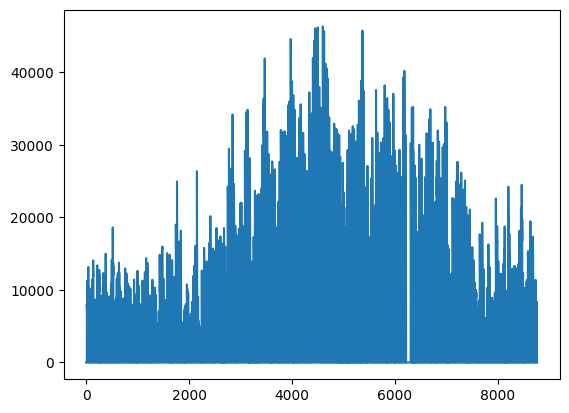

In [33]:
plt.plot([i[3] for i in coordinates])


In [34]:
sum([i[3] for i in coordinates])

44888820.3021367

In [35]:
coordinates = []
from itertools import product
for i,j,k in zip(demand_list[:8760], solar_list[:8760], wind_list[:8760]):
    l = solution_wo_disp.evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates.append((i, j, k, l[0][0]))
    else:
        coordinates.append((i, j, k, 0))
        

In [36]:
[i[3] for i in coordinates].count(0)

7947

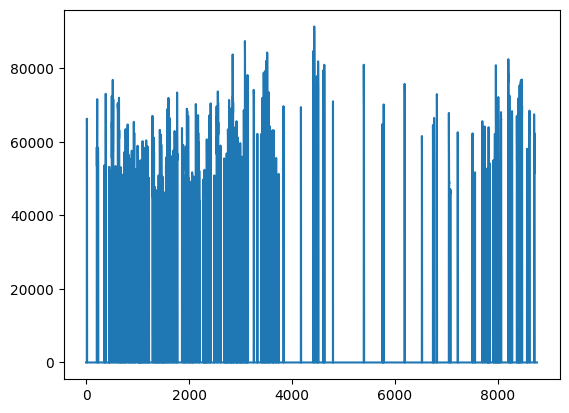

In [37]:
plt.plot([i[3] for i in coordinates])

In [38]:
sum([i[3] for i in coordinates])

47778925.13204975